In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
file_name = 'stock_tweets.csv'
df = pd.read_csv(file_name)

# Function to clean the Date column
def clean_date(date_str):
    return date_str.split(' ')[0] if '-' in date_str else None

# Clean the Date column by applying the clean_date function
df['Date'] = df['Date'].apply(clean_date)

# Drop rows with None values in the Date column
df = df.dropna(subset=['Date'])

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_dates.csv', index=False)

# Display the cleaned DataFrame
print(df.head())


         Date                                              Tweet Stock Name  \
0  2022-09-29  Mainstream media has done an amazing job at br...       TSLA   
1  2022-09-29  Tesla delivery estimates are at around 364k fr...       TSLA   
2  2022-09-29  3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3  2022-09-29  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4  2022-09-29  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   

  Company Name  
0  Tesla, Inc.  
1  Tesla, Inc.  
2  Tesla, Inc.  
3  Tesla, Inc.  
4  Tesla, Inc.  


In [ ]:
import pandas as pd

# Load the cleaned CSV file
file_name = 'cleaned_dates.csv'
df = pd.read_csv(file_name)

# Define positive and negative keywords
positive_keywords = ["Bullish", "Growth", "Upbeat", "Outperform", "Rally", "Soar", "Surge", "Positive", "Gains", 
                     "Undervalued", "Strong", "Increase", "Profit", "Success", "Expansion", "Booming", "Optimistic", 
                     "Breakthrough", "Upgrade", "Dividend", "Buy", "Long", "Momentum", "Rising", "Recovery", "Earnings", 
                     "Accumulate", "Improvement", "Hold", "Stability", "Upside", "Confidence", "Innovation", "Leadership", 
                     "Demand", "Market Share", "Invest", "Opportunity", "Acquisition", "Growth Strategy", "New Market"]
negative_keywords = ["Bearish", "Decline", "Downgrade", "Loss", "Downturn", "Recession", "Slump", "Negative", "Falling", 
                     "Overvalued", "Weak", "Decrease", "Debt", "Failure", "Contraction", "Struggling", "Pessimistic", 
                     "Crisis", "Down", "Sell", "Short", "Volatility", "Drop", "Collapse", "Bankruptcy", "Risk", "Layoffs", 
                     "Default", "Warning", "Restructuring", "Slowdown", "Losses", "Reduction", "Disappointing", 
                     "Missed Expectations", "Oversupply", "Competition", "Headwinds", "Doubts", "Uncertainty", 
                     "Challenges", "Regulatory Issues"]

# Function to calculate the sentiment score for each row
def calculate_sentiment_score(text):
    score = 0
    for keyword in positive_keywords:
        if keyword.lower() in text.lower():
            score += 1
    for keyword in negative_keywords:
        if keyword.lower() in text.lower():
            score -= 1
    return score

# Apply the calculate_sentiment_score function to the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(calculate_sentiment_score)

# Save the updated DataFrame to a new CSV file
df.to_csv('sentiment_scores.csv', index=False)

# Display the updated DataFrame
print(df.head())


         Date  Tweet Stock Name Company Name
0  2022-09-29      0       TSLA  Tesla, Inc.
1  2022-09-29      0       TSLA  Tesla, Inc.
2  2022-09-29      0       TSLA  Tesla, Inc.
3  2022-09-29      0       TSLA  Tesla, Inc.
4  2022-09-29      0       TSLA  Tesla, Inc.


In [ ]:
#SUM ALL SENTIMENT FOR EACH DAY WHERE THE DATE IS THE SAME
import pandas as pd

# Load the sentiment_scores csv file into a pandas dataframe
df = pd.read_csv("sentiment_scores.csv")

# Group the dataframe by the 'date' column and sum the 'Tweet' column for each date
grouped_df = df.groupby('Date')['Tweet'].sum().reset_index()

# Save the grouped dataframe to a new csv file called 'sentiment_scores_summed.csv'
grouped_df.to_csv("sentiment_scores_summed.csv", index=False)


In [ ]:
#CLEAN STOCK FINANCE DATA TO REVEAL STOCK TREND
import pandas as pd

# Load the stock_data.csv file into a pandas dataframe
df = pd.read_csv('stock_data.csv')

# Calculate the trend for each row
df['Trend'] = (df['Close'] - df['Open'] > 0).astype(int)

# Drop all columns except for 'Date', 'Stock Name', and 'Trend'
df = df[['Date', 'Stock Name', 'Trend']]

# Save the new dataset to a new CSV file
df.to_csv('stock_trend.csv', index=False)


In [ ]:
#MERGE THE TWO CSVS ABOVE
import pandas as pd

# Load the stock_trend.csv file into a pandas dataframe
df1 = pd.read_csv('stock_trend.csv')

# Load the sentiment.csv file into a pandas dataframe
df2 = pd.read_csv('sentiment.csv')

# Merge the two dataframes based on the 'Date' column
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)


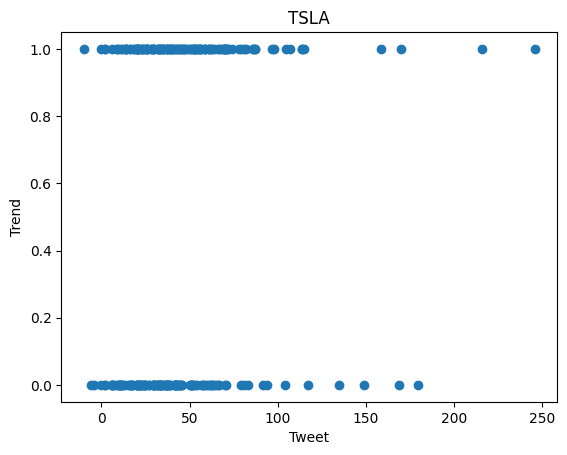

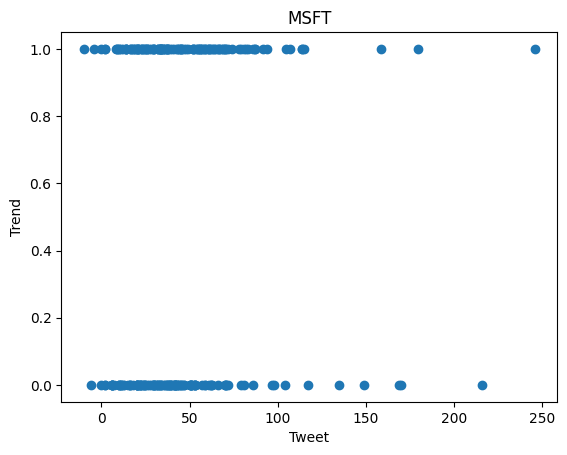

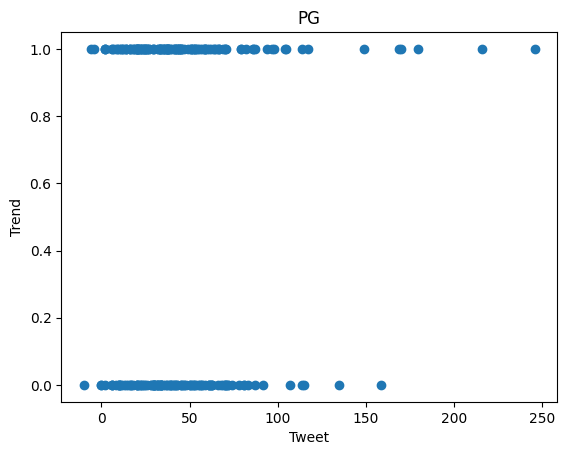

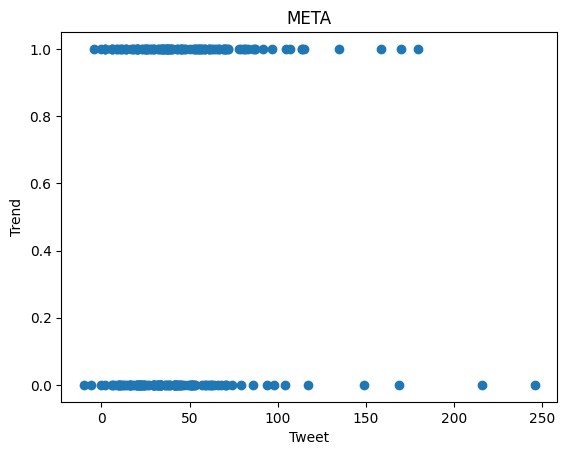

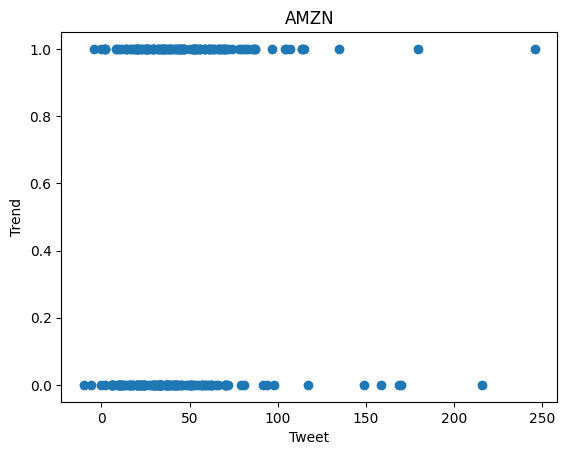

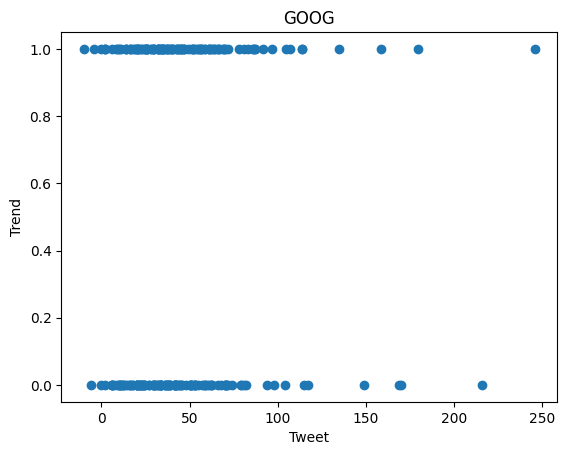

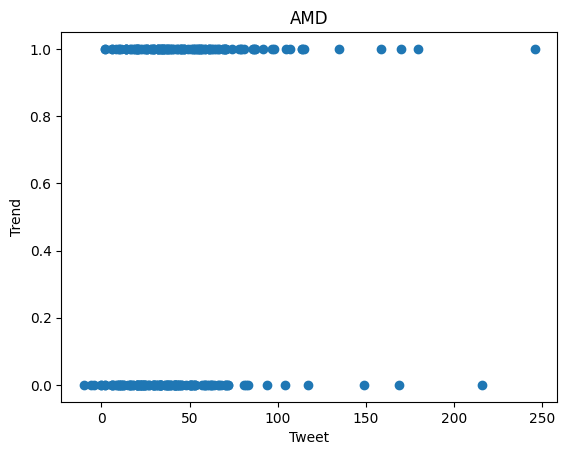

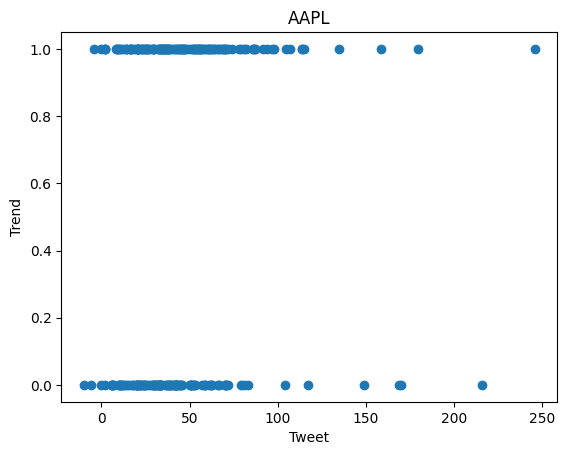

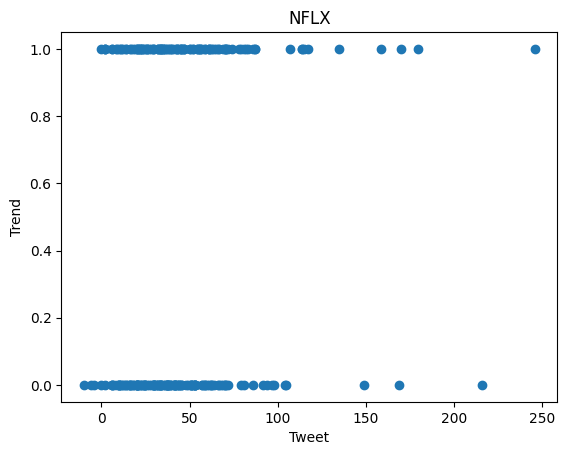

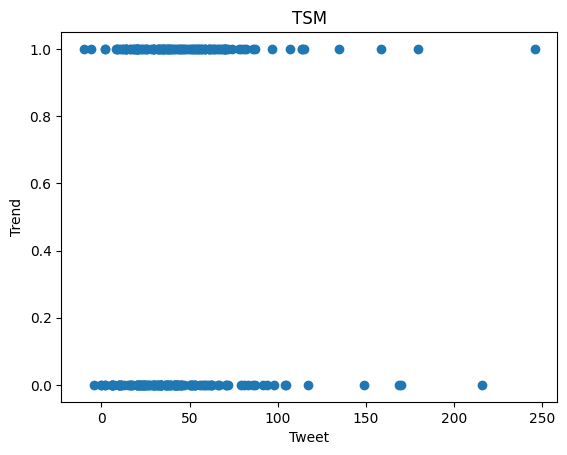

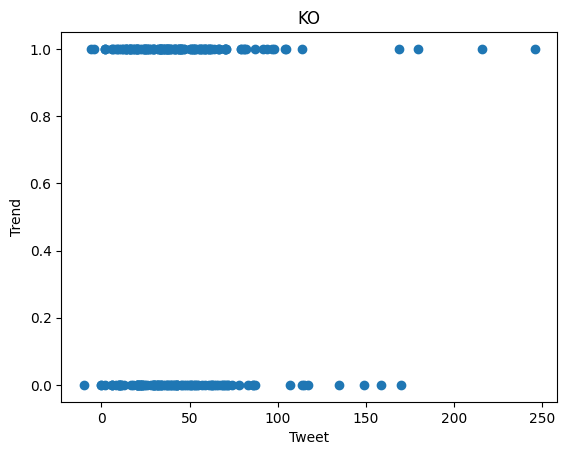

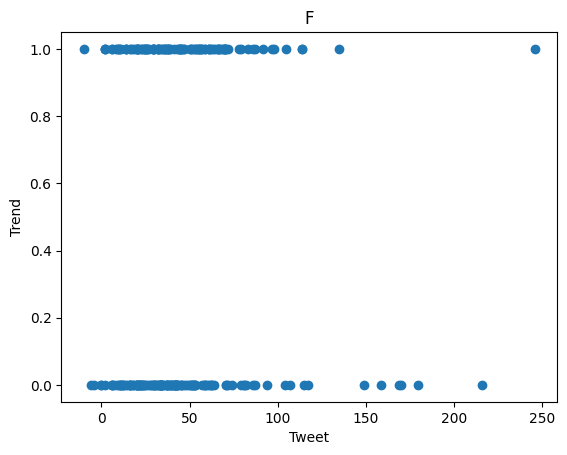

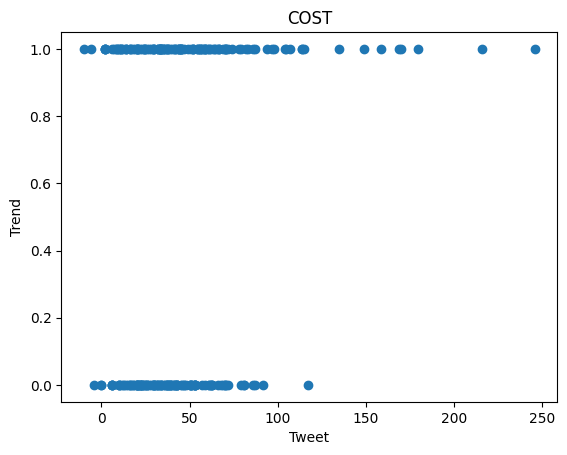

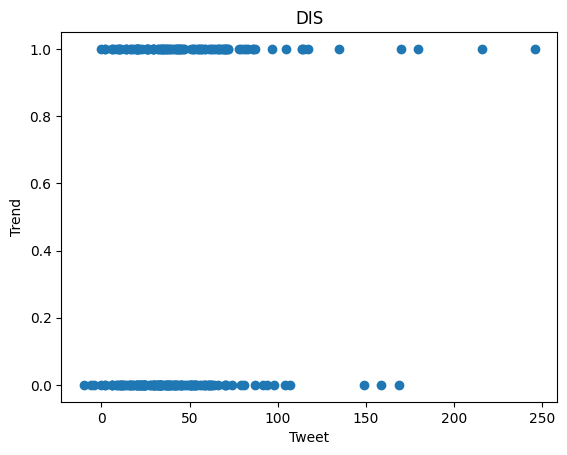

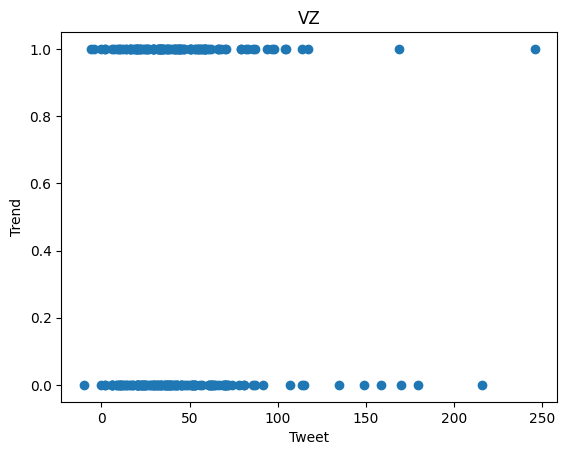

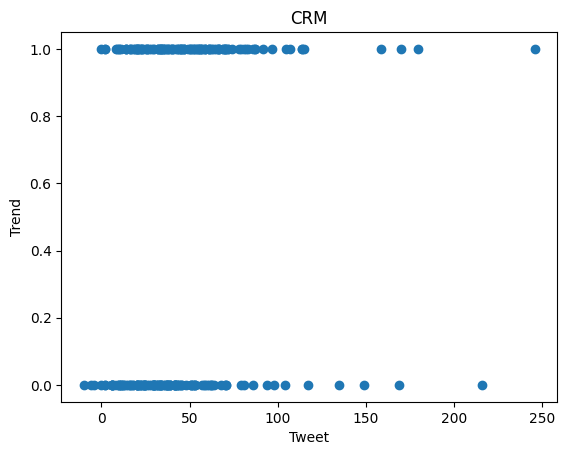

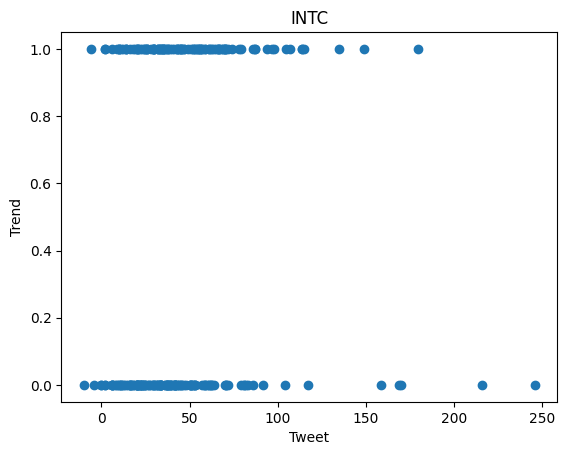

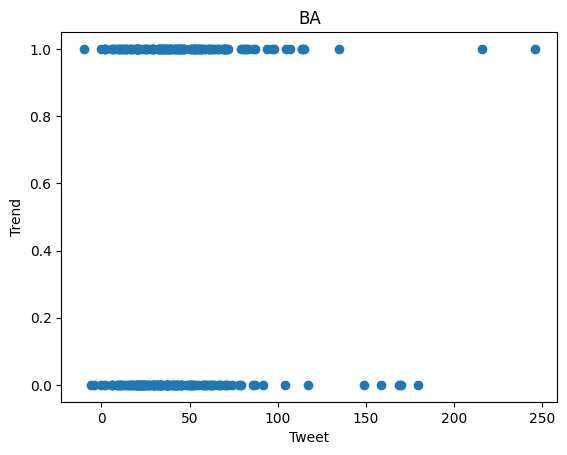

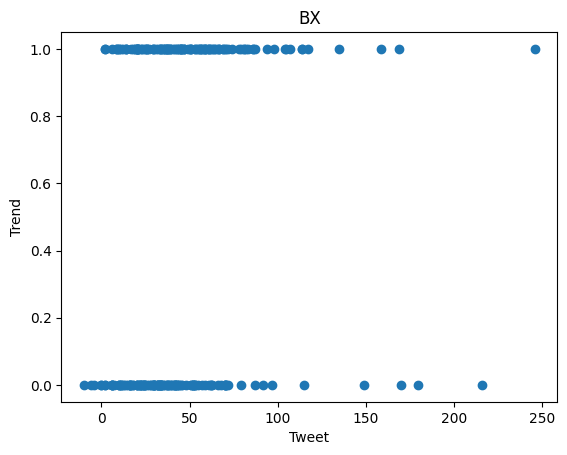

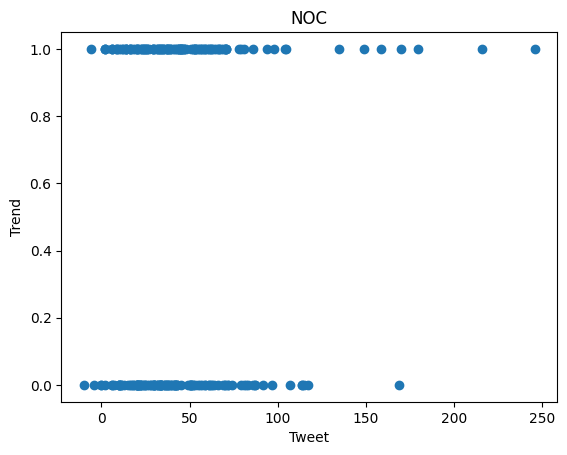

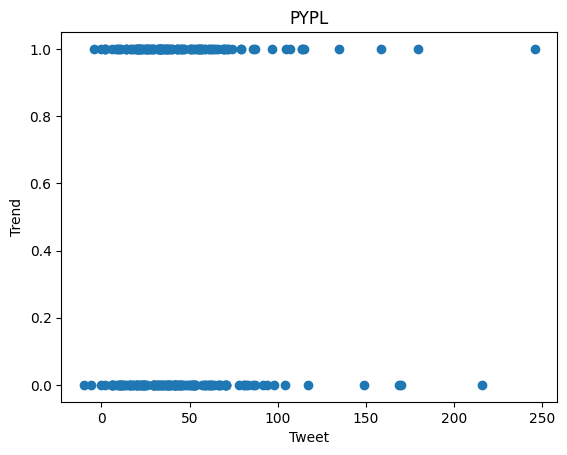

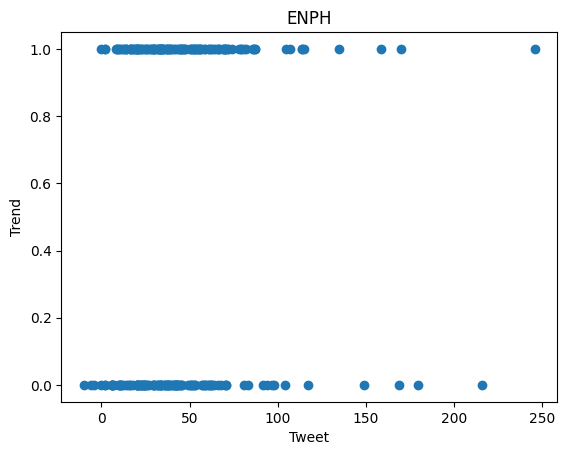

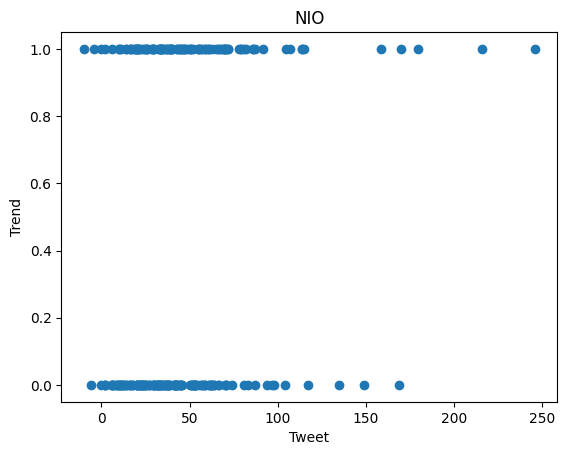

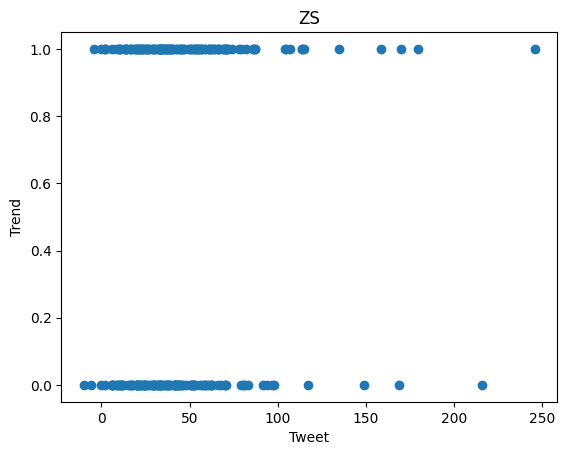

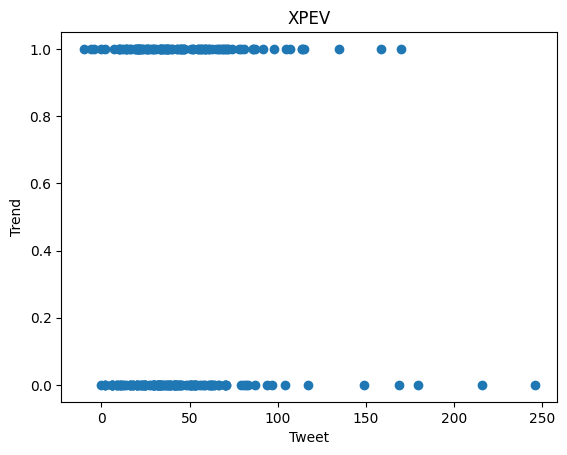

In [ ]:
#VISUALIZE THE DATA
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged_data.csv file into a pandas dataframe
df = pd.read_csv('merged_data.csv')

# Define a list of stock names to plot
stock_names = ['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG',
               'AMD', 'AAPL', 'NFLX', 'TSM', 'KO', 'F', 
               'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA', 
               'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV']

# Loop through each stock name and plot a scatter plot of 'Tweet' vs. 'Trend'
for stock_name in stock_names:
    # Filter the dataframe to only include rows for the current stock name
    filtered_df = df[df['Stock Name'] == stock_name]
    
    # Plot a scatter plot of 'Tweet' vs. 'Trend'
    plt.scatter(filtered_df['Tweet'], filtered_df['Trend'])
    plt.xlabel('Tweet')
    plt.ylabel('Trend')
    plt.title(stock_name)
    plt.show()
